<a href="https://colab.research.google.com/github/ShivaniSinghRajawat/Linkedin-Job-Posting-Analysis/blob/main/Linkedin_Job_Posting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>INSTALLING KAGGLE AND DOWNLOADING KAGGLE DATASET

In [ ]:
#install kaggle and initialize its API
!pip install kaggle --quiet


In [ ]:
#upload kaggle.json file
from google.colab import files
files.upload()


In [3]:
#create a kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

In [4]:
#copy kaggle.json file
!cp kaggle.json ~/.kaggle

In [5]:
#set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s 'Linkedin-Job-Posting'

ref                                                        title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
arshkon/linkedin-job-postings                              LinkedIn Job Postings (2023 - 2024)                 166472808  2024-08-19 05:49:43.010000          58351        419  1.0              
asaniczka/linkedin-data-engineer-job-postings              Linkedin Data Engineer Job Postings                   6795661  2023-12-27 20:42:18.727000           1087         61  1.0              
asaniczka/data-scientist-linkedin-job-postings             Data Scientist - Linkedin Job Postings                5855366  2024-06-20 08:14:46.373000            495         28  1.0              
adampq/linkedin-jobs-machine-l

In [7]:
!kaggle datasets download -d 'arshkon/linkedin-job-postings'\
-p ../Data/KaggleLinkedinJobPostingData

Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
License(s): CC-BY-SA-4.0
 82% 130M/159M [00:00<00:00, 394MB/s] 
100% 159M/159M [00:00<00:00, 337MB/s]


In [8]:
ls -ltr ../Data/KaggleLinkedinJobPostingData

total 162572
-rw-r--r-- 1 root root 166472808 Aug 19  2024 linkedin-job-postings.zip


In [9]:
#unzip csv
!unzip ../Data/KaggleLinkedinJobPostingData/linkedin-job-postings.zip \
-d ../Data/KaggleLinkedinJobPostingData.csv

Archive:  ../Data/KaggleLinkedinJobPostingData/linkedin-job-postings.zip
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/companies/companies.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/companies/company_industries.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/companies/company_specialities.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/companies/employee_counts.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/jobs/benefits.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/jobs/job_industries.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/jobs/job_skills.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/jobs/salaries.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/mappings/industries.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/mappings/skills.csv  
  inflating: ../Data/KaggleLinkedinJobPostingData.csv/postings.csv  


In [10]:
#grant permissions
!chmod 777 -R ../Data/KaggleLinkedinJobPostingData.csv

In [11]:
ls -ltr ../Data/KaggleLinkedinJobPostingData

total 162572
-rw-r--r-- 1 root root 166472808 Aug 19  2024 linkedin-job-postings.zip


In [12]:
ls -ltr ../Data/KaggleLinkedinJobPostingData.csv

total 504748
-rwxrwxrwx 1 root root 516843769 Aug 19  2024 postings.csv*
drwxrwxrwx 2 root root      4096 Dec  2 08:07 companies/
drwxrwxrwx 2 root root      4096 Dec  2 08:07 jobs/
drwxrwxrwx 2 root root      4096 Dec  2 08:07 mappings/


<H1>EXPLORATORY DATA ANALYSIS


In [13]:
import pandas as pd
df = pd.read_csv('/Data/KaggleLinkedinJobPostingData.csv/postings.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [15]:
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [16]:
df.tail(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,72500.0,92675.0,6059.0


In [17]:
df.isnull()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
123845,False,False,False,False,True,True,False,False,False,True,...,True,False,False,False,False,True,True,True,True,True
123846,False,False,False,False,True,True,False,False,False,True,...,True,False,False,False,False,True,True,True,False,False
123847,False,False,False,False,True,True,False,False,False,True,...,True,False,True,False,False,True,True,True,True,True


In [18]:
df.isnull().sum()

,0
job_id,0
company_name,1719
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,1717
views,1689
med_salary,117569


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df[df.duplicated()]


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips


In [21]:
df[df.duplicated(keep=False)]


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips


<h1>HANDLING MISSING VALUES

<h3>Filling missing Company names with the Unknown Company name

In [22]:
df['company_name'] = df['company_name'].fillna("Unknown Company")


In [23]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,1717
views,1689
med_salary,117569


<h3>Filling Missing Company_id with placeholders

In [24]:
df['company_id'] = df['company_id'].fillna(-1)


In [25]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,0
views,1689
med_salary,117569


<h3>Filling Missing Company Description with 'No description provided'

In [26]:
df['description'] = df['description'].fillna("No description provided")


In [27]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,0
max_salary,94056
pay_period,87776
location,0
company_id,0
views,1689
med_salary,117569


<h3>Filling Missing views filled with median (views are numeric, highly skewed)

In [28]:
df['views'] = df['views'].fillna(df['views'].median())


In [29]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,0
max_salary,94056
pay_period,87776
location,0
company_id,0
views,0
med_salary,117569


<h3>Dropping columns with too many missing + low importance values


In [30]:
df = df.drop(columns=[
    'skills_desc','closed_time','posting_domain',
    'application_url','fips','zip_code'
])


In [33]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,0
max_salary,94056
pay_period,87776
location,0
company_id,0
views,0
med_salary,117569


In [32]:
df['salary_available'] = df['min_salary'].notnull().astype(int)


In [34]:
df['applies'] = df['applies'].fillna(0)


In [35]:
df['remote_allowed'] = df['remote_allowed'].fillna(0)


In [36]:
df['formatted_experience_level'] = df['formatted_experience_level'].fillna("Not specified")


In [37]:
df.isnull().sum()

,0
job_id,0
company_name,0
title,0
description,0
max_salary,94056
pay_period,87776
location,0
company_id,0
views,0
med_salary,117569


<h1>VISUALIZATIONS FOR EDA

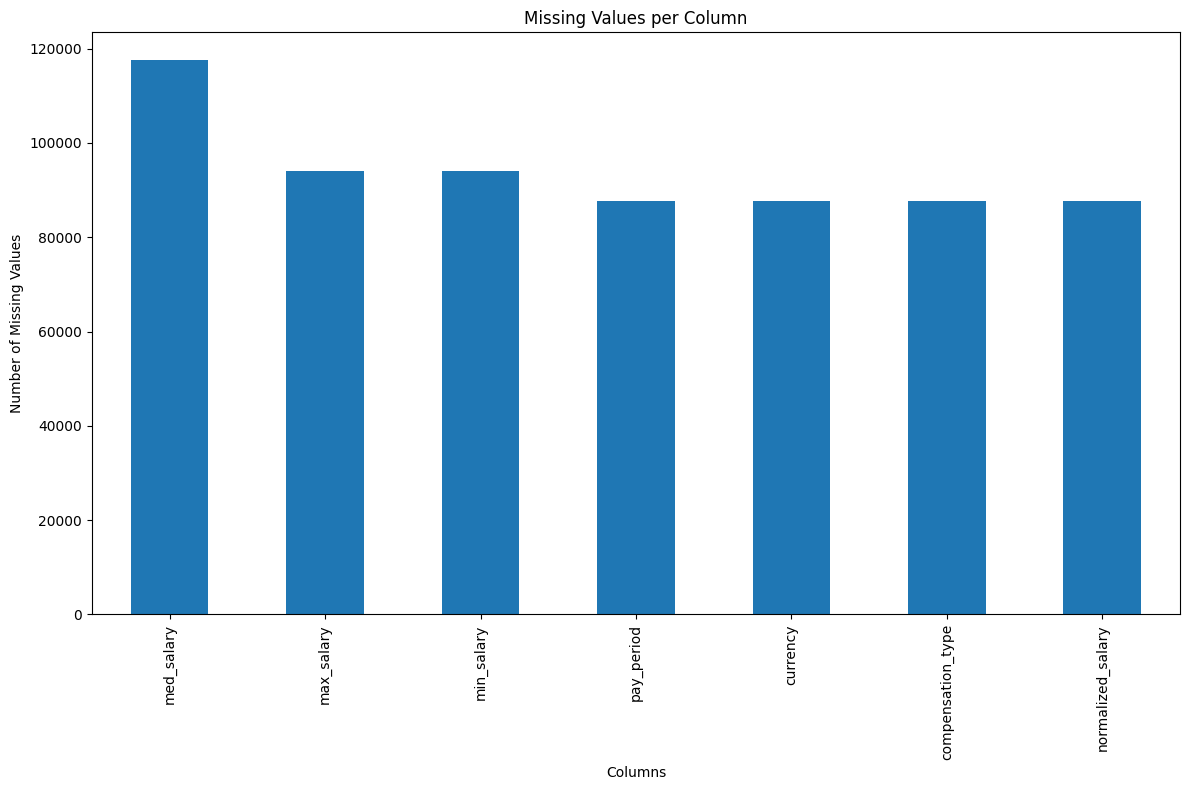

In [38]:
import matplotlib.pyplot as plt

# Calculate missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
missing.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()


### Average Normalized Salary by Experience Level

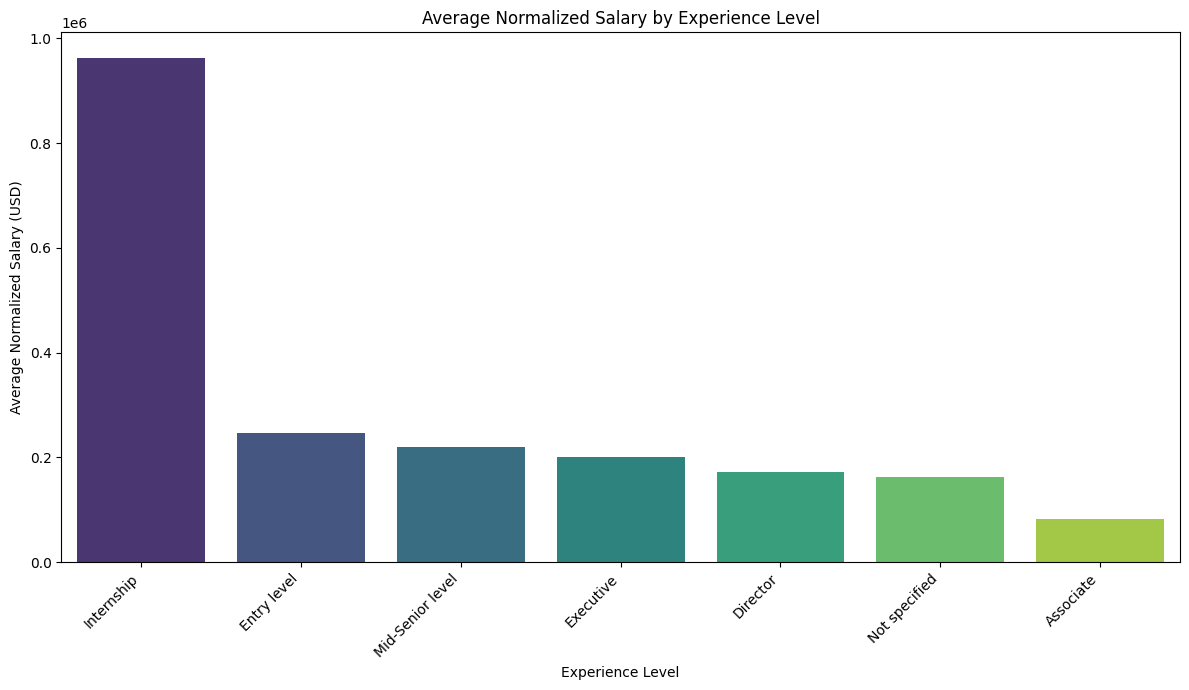

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where normalized_salary is NaN for this analysis
salary_experience_df = df.dropna(subset=['normalized_salary']).copy()

# Calculate the average normalized salary for each experience level
average_salary_by_experience = salary_experience_df.groupby('formatted_experience_level')['normalized_salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=average_salary_by_experience.index, y=average_salary_by_experience.values, palette='viridis', hue=average_salary_by_experience.index, legend=False)
plt.title('Average Normalized Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Normalized Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Normalized Salary Distribution by Experience Level (Box Plot)

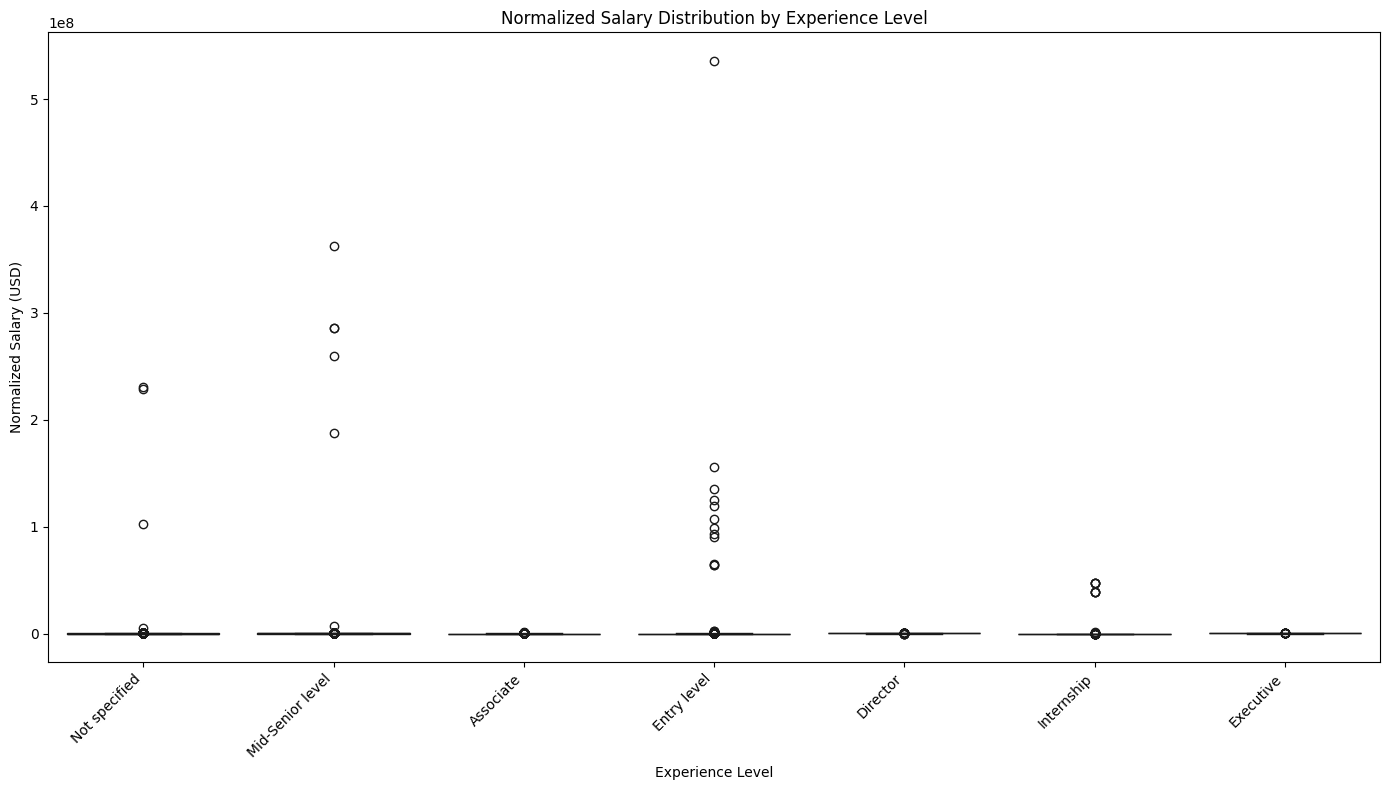

In [56]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=salary_experience_df, x='formatted_experience_level', y='normalized_salary', palette='magma', hue='formatted_experience_level', legend=False)
plt.title('Normalized Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Normalized Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Most Common Job Titles

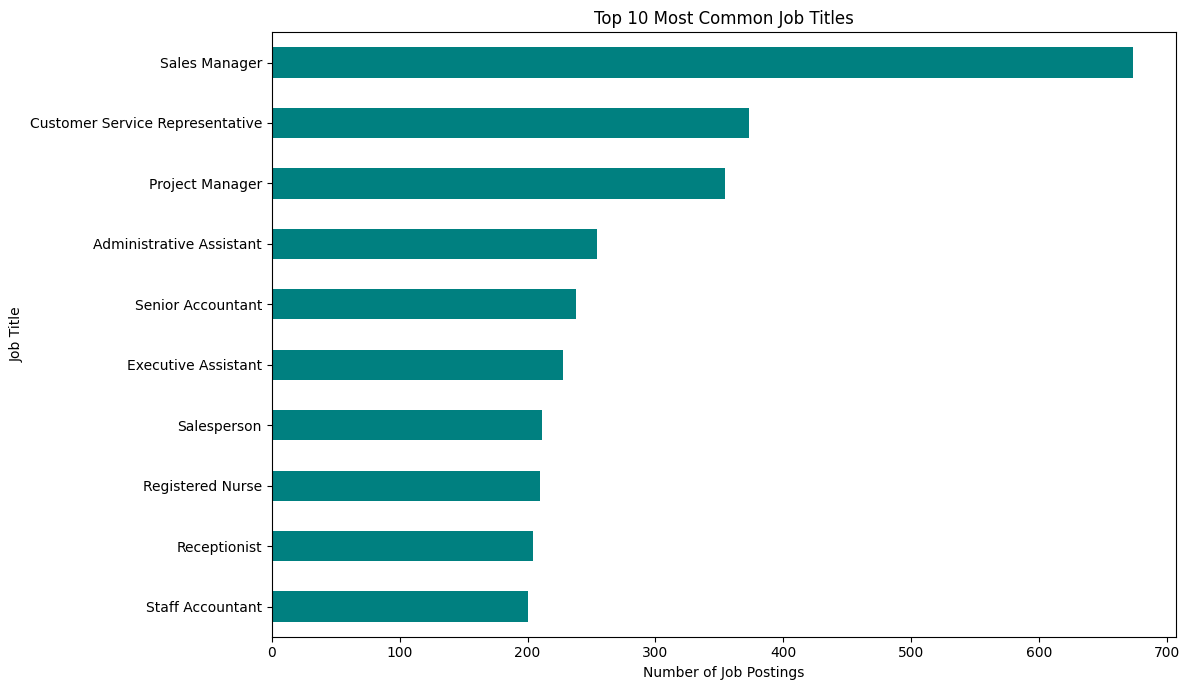

In [53]:
plt.figure(figsize=(12, 7))
df['title'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.gca().invert_yaxis() # To display the highest count at the top
plt.tight_layout()
plt.show()

### Distribution of `normalized_salary` (where available)

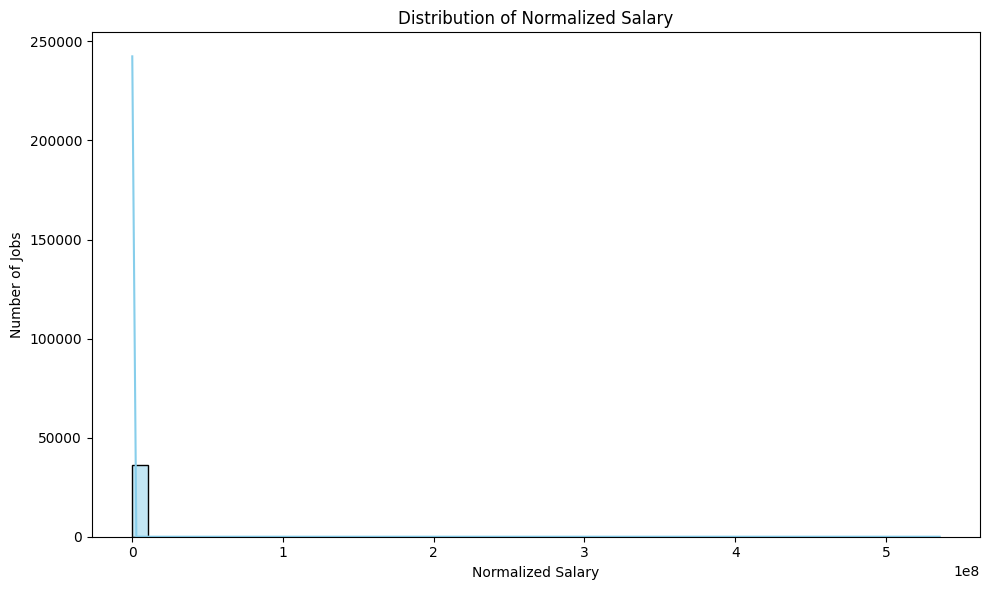

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_salary'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Normalized Salary')
plt.xlabel('Normalized Salary')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

### Distribution of `pay_period`

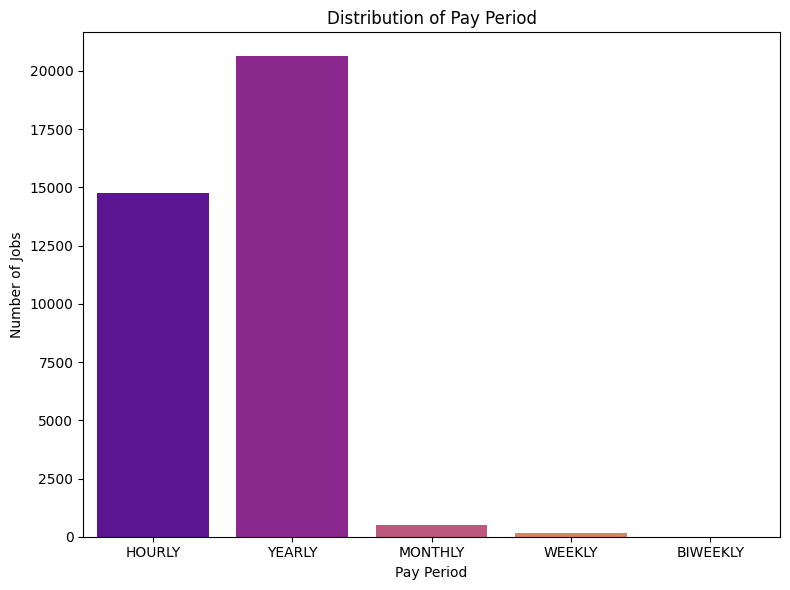

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df.dropna(subset=['pay_period']), x='pay_period', hue='pay_period', palette='plasma', legend=False)
plt.title('Distribution of Pay Period')
plt.xlabel('Pay Period')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

### Distribution of `remote_allowed`

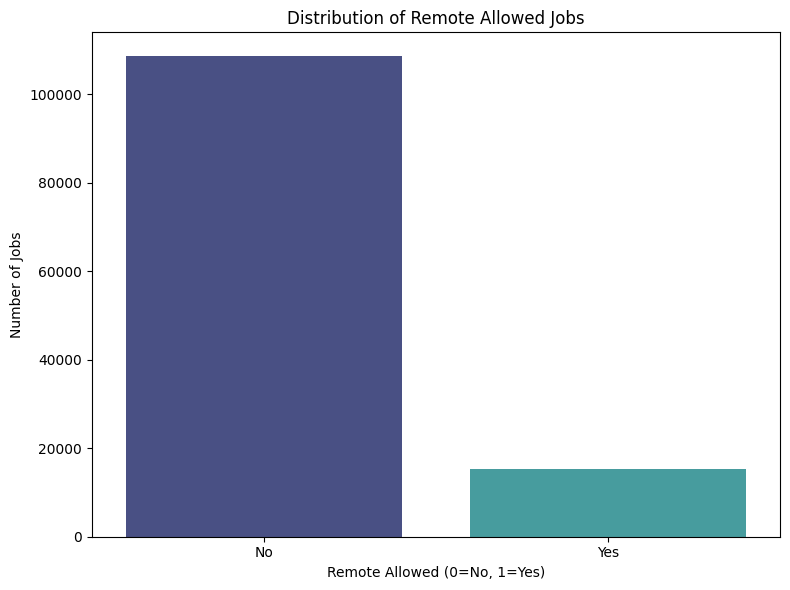

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='remote_allowed', hue='remote_allowed', palette='mako', legend=False)
plt.title('Distribution of Remote Allowed Jobs')
plt.xlabel('Remote Allowed (0=No, 1=Yes)')
plt.ylabel('Number of Jobs')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

### Distribution of `formatted_work_type`

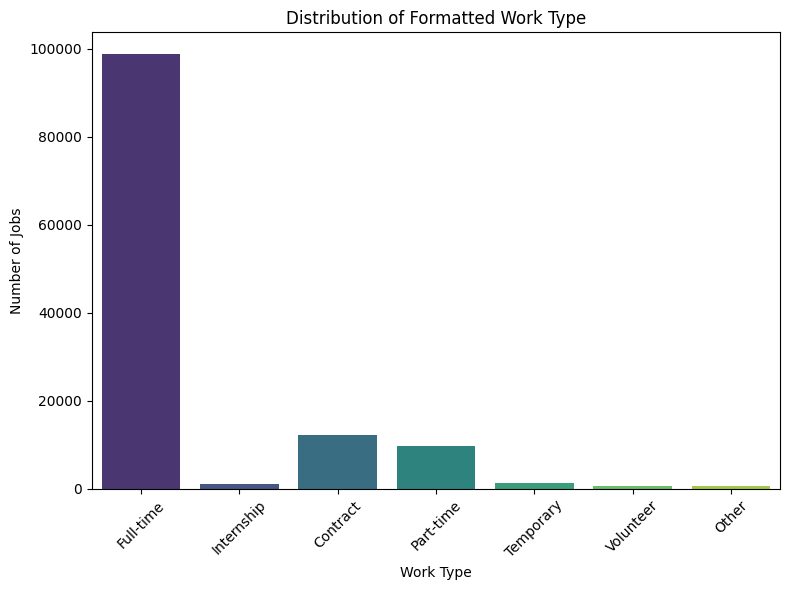

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='formatted_work_type', hue='formatted_work_type', palette='viridis', legend=False)
plt.title('Distribution of Formatted Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of `formatted_experience_level`

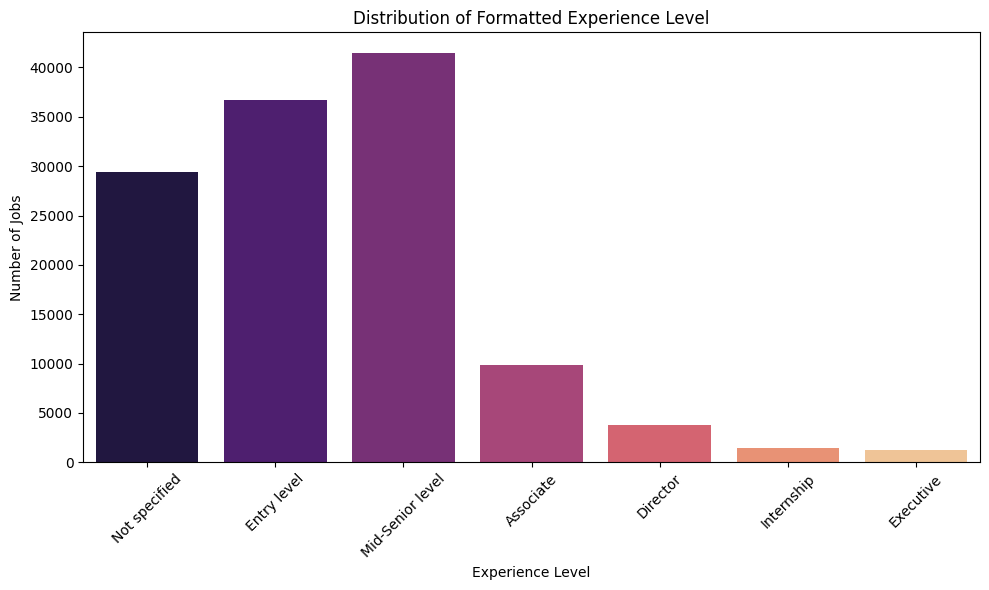

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='formatted_experience_level', hue='formatted_experience_level', palette='magma', legend=False)
plt.title('Distribution of Formatted Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Most Common Job Locations

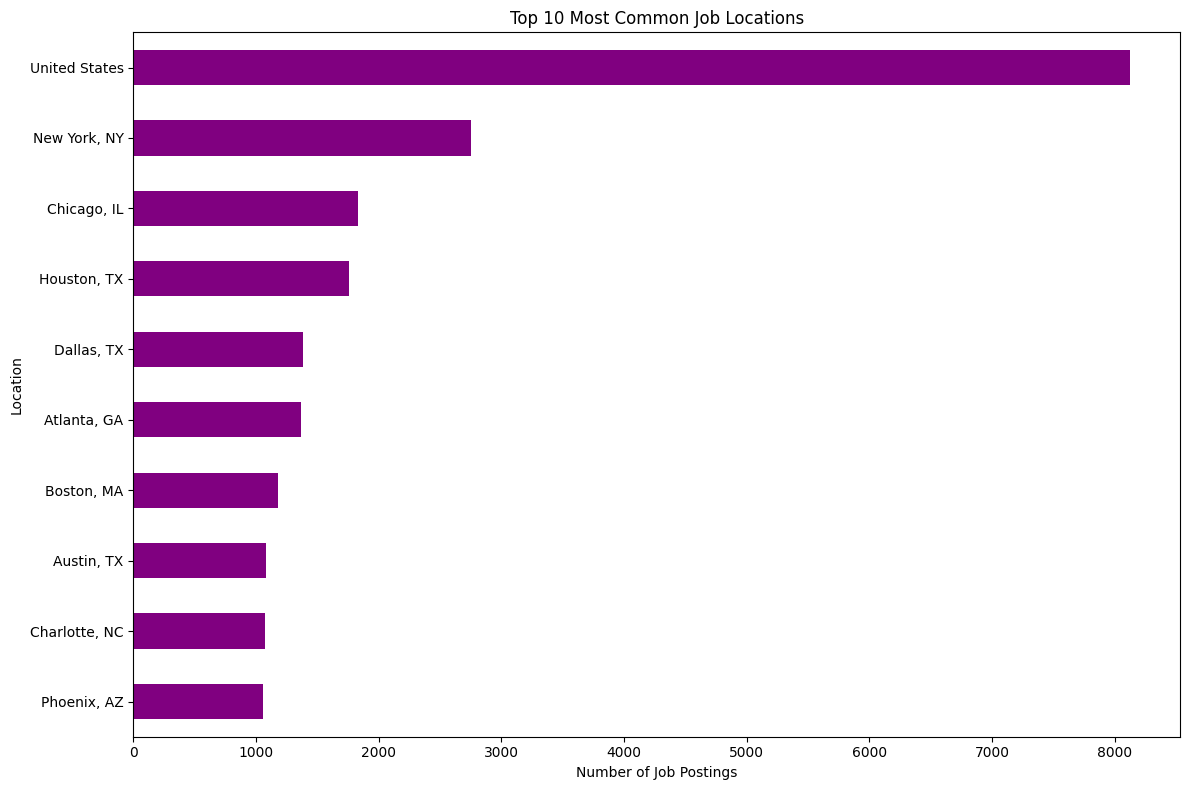

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
df['location'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Most Common Job Locations')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.gca().invert_yaxis() # To display the highest count at the top
plt.tight_layout()
plt.show()

### Top 10 Companies by Number of Job Postings

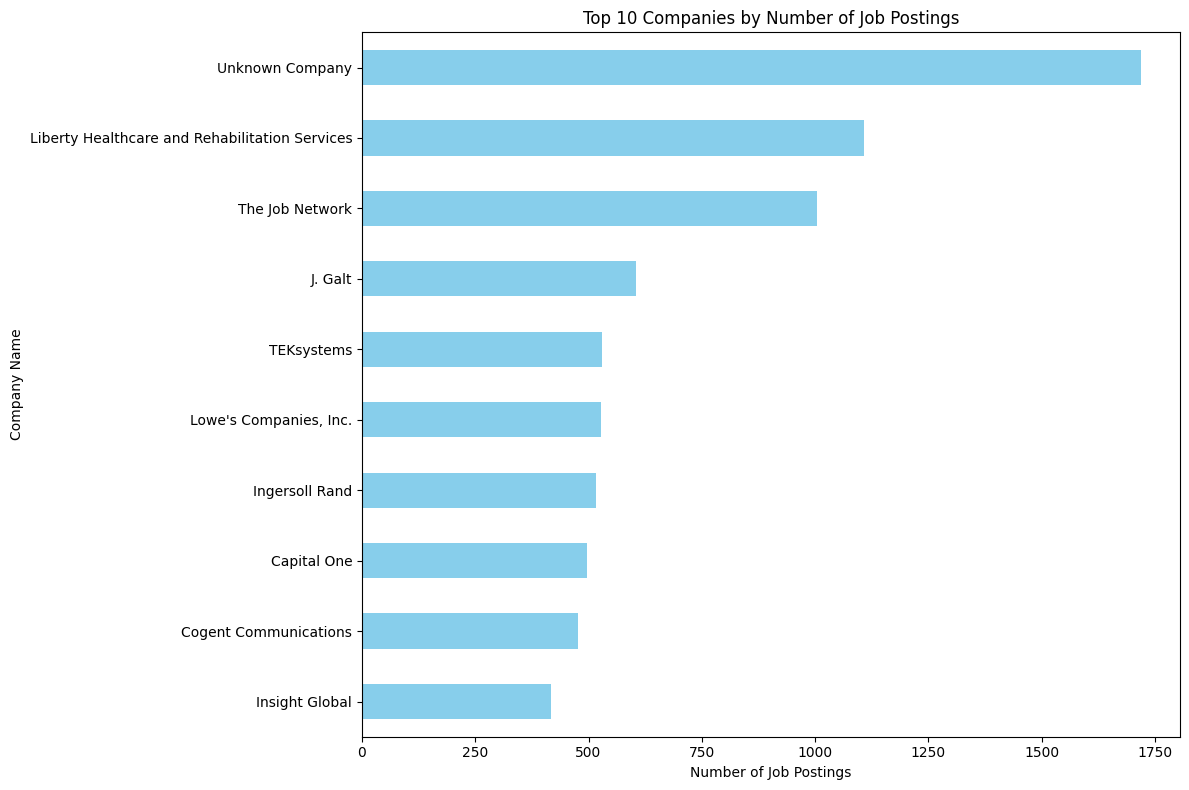

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
df['company_name'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.gca().invert_yaxis() # To display the highest count at the top
plt.tight_layout()
plt.show()

### Top Job Titles for the Top 10 Companies

In [59]:
# Get the top 10 companies by job postings
top_10_companies = df['company_name'].value_counts().head(10).index.tolist()

print(f"Top 10 Companies: {top_10_companies}")

# Filter the DataFrame for these top 10 companies
df_top_companies = df[df['company_name'].isin(top_10_companies)]

# Display top job titles for each of the top 10 companies
for company in top_10_companies:
    print(f"\nTop Job Titles for {company}:")
    # Filter for the current company and get the value counts of job titles
    top_titles_for_company = df_top_companies[df_top_companies['company_name'] == company]['title'].value_counts().head(5)
    display(top_titles_for_company)


Top 10 Companies: ['Unknown Company', 'Liberty Healthcare and Rehabilitation Services', 'The Job Network', 'J. Galt', 'TEKsystems', "Lowe's Companies, Inc.", 'Ingersoll Rand', 'Capital One', 'Cogent Communications', 'Insight Global']

Top Job Titles for Unknown Company:


,count
title,
Salesperson,37
Administrative Assistant,23
Associate Attorney,18
Account Manager,12
Physical Therapist,11



Top Job Titles for Liberty Healthcare and Rehabilitation Services:


,count
title,
HOSPICE REGISTERED NURSE,44
CERTIFIED NURSING ASSISTANT - OAK FOREST HEALTH & REHAB CENTER,28
HOME CARE REGISTERED NURSE,17
LICENSED PRACTICAL NURSE - PINEHURST HEALTHCARE & REHABILITATION CENTER,17
HOME CARE OCCUPATIONAL THERAPIST OT,16



Top Job Titles for The Job Network:


,count
title,
Board Certified Behavior Analyst (BCBA),68
Physical Therapist Assistant (PTA),28
Physical Therapist (PT),23
Occupational Therapy Assistant (COTA),22
Registered Dental Hygienist,11



Top Job Titles for J. Galt:


,count
title,
Sales Manager,592
Sales Representative,6
Business Development Manager,4
VP of Sales,2



Top Job Titles for TEKsystems:


,count
title,
Customer Service Representative,16
Bilingual Portuguese Customer Service - At Home,6
PC Technician,6
ISP Support Technician,6
Medical Biller,6



Top Job Titles for Lowe's Companies, Inc.:


,count
title,
Warehouse Part Time Overnight,36
Retail Sales – Part Time,36
Part Time - Fulfillment Associate - Flexible,33
Part Time - Head Cashier - Flexible,30
Seasonal Merchandising Service Associate - Weekends Preferred,24



Top Job Titles for Ingersoll Rand:


,count
title,
Service Technician,69
Service Supervisor,17
Customer Service Technician,14
Inside Sales Application Engineer II,12
Mechanical Assembler,9



Top Job Titles for Capital One:


,count
title,
"Manager, Information Security Office (ISO) Consultant",13
"Senior Manager, Technical Program Management (Bank Tech)",9
"Senior Manager, Generative AI Product Engineering - People Leader - (Remote Eligible)",8
Anti-Money Laundering Subject Matter Expert (SME) - Special Investigations Unit (SIU),8
"Director, Technical Program Management - Card Data Tech",7



Top Job Titles for Cogent Communications:


,count
title,
Global Account Manager,73
National Account Manager,20
Regional Account Manager,17
"Service Delivery Coordinator, Washington, DC",16
Cash Application Analyst – Washington DC,16



Top Job Titles for Insight Global:


,count
title,
Executive Assistant,6
Pharmacy Technician,4
Accounting Manager,4
Accountant,4
Field Services Engineer,3
